In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [14]:
%%capture
!pip -q install textblob

# Îç∞Ïù¥ÌÑ∞ ÌÜµÌï©

In [1]:
import pandas as pd

# ÌååÏùº Í≤ΩÎ°ú Î∞è Ï†ïÎ≥¥
files = {
    "Nami Island": "gangwon_namiIsland.csv",
    "Seoraksan": "gangwon_mt.csv",
    "Bulguksa": "bulguksa.csv",
    "Hahoe Village": "andong_village.csv",
    "Andong Museum" : "andong_museum.csv",
    "Gyeongju Museum" : "gyeongju_museum.csv"
}

place_type = {
    "Nami Island": "traditional",
    "Seoraksan": "traditional",
    "Bulguksa": "history",
    "Hahoe Village": "history",
    "Andong Museum" : "museum",
    "Gyeongju Museum" : "museum"
}

encodings_to_try = ["utf-8", "cp949", "ISO-8859-1", "utf-16"]
columns = ["review"]

df_list = []

for place, path in files.items():
    for enc in encodings_to_try:
        try:
            df = pd.read_csv(path, encoding=enc, header=None)
            df = df.rename(columns={0: "review"})
            df["place"] = place
            df["type"] = place_type[place]
            df_list.append(df)
            print(f"{place} loaded successfully with encoding: {enc}")
            break
        except:
            continue

df_combined = pd.concat(df_list, ignore_index=True)


Nami Island loaded successfully with encoding: utf-8
Seoraksan loaded successfully with encoding: ISO-8859-1
Bulguksa loaded successfully with encoding: utf-8
Hahoe Village loaded successfully with encoding: utf-8
Andong Museum loaded successfully with encoding: utf-8
Gyeongju Museum loaded successfully with encoding: utf-8


In [2]:
df_combined.head()

review        place         type
0                                             review  Nami Island  traditional
1  ÏµúÍ∑ºÏàúÍ∞ÄÏû• ÏµúÍ∑ºÏùò Í≤åÏãú ÎÇ†ÏßúÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨Îêú Î¶¨Î∑∞.ÏÉÅÏÑ∏ Î¶¨Î∑∞:ÎåÄÍ∏∞ Ïãú...  Nami Island  traditional
2                                       One Must Go!  Nami Island  traditional
3  If in Seoul one must go. Very romantic and ext...  Nami Island  traditional
4  From Seoul to Serenity: A Day on Nami Island N...  Nami Island  traditional

In [ ]:
df_combined.info()

In [ ]:
df_combined['place'].unique()

In [ ]:
df_combined[df_combined['place'] == 'Seoraksan'].head()

In [ ]:
df_combined[df_combined['place'] == 'Bulguksa'].head()

In [3]:
# ÏãúÏä§ÌÖú Î¨∏Íµ¨ Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï†úÍ±∞
df_combined = df_combined[~df_combined["review"].str.contains(
    "Most Recent:Reviews ordered by most recent publish date",
    case=False,
    na=False
)]

# 2. Ï≤´ Î≤àÏß∏ ÌñâÏóê 'review' ÌÖçÏä§Ìä∏Í∞Ä Îì§Ïñ¥Í∞Ñ Í≤ΩÏö∞ Ï†úÍ±∞
df_combined = df_combined[df_combined["review"] != "review"]

# 3. Í≤∞Ï∏°Ïπò(NaN) Î∞è Í≥µÎ∞±("") Î¶¨Î∑∞ Ï†úÍ±∞
df_combined = df_combined[df_combined["review"].notna()]  # NaN Ï†úÍ±∞
df_combined = df_combined[df_combined["review"].str.strip() != ""]  # Îπà Î¨∏ÏûêÏó¥ Ï†úÍ±∞

# 4. Ïù∏Îç±Ïä§ Ï¥àÍ∏∞Ìôî
df_combined.reset_index(drop=True, inplace=True)


In [4]:
df_combined['review'].tail()

1525    This is a great museum. It's small enough to g...
1526    When travelling around South Korea there are m...
1527    I had a beautiful afternoon in Gyeongju gettin...
1528    Excellent museum with lots of fascinating exhi...
1529    Gyeongju has an incredible past. This museum c...
Name: review, dtype: object

In [ ]:
df_combined.info()

# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ ÏµúÏ¢Ö

In [5]:
import nltk
# nltk Î¶¨ÏÜåÏä§ (Ï≤òÏùå 1Î≤àÎßå Ïã§Ìñâ)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

- NLTK Î¶¨ÏÜåÏä§(wordnet, omw, POS ÌÉúÍ±∞) Ï§ÄÎπÑ

In [6]:
# NLTK (Î†àÎßàÌÉÄÏù¥Ï†Ä + POS ÌÉúÍπÖ)

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

# (ÏµúÏ¥à 1ÌöåÎßå ÌïÑÏöî) Î¶¨ÏÜåÏä§ Ï§ÄÎπÑ
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')
# ÌÉúÍ±∞Îäî Î∞∞Ìè¨Ïóê Îî∞Îùº Ïù¥Î¶ÑÏù¥ Îã§Î•º Ïàò ÏûàÏñ¥ Îëò Îã§ ÏãúÎèÑ
for res in ['taggers/averaged_perceptron_tagger', 'taggers/averaged_perceptron_tagger_eng']:
    try:
        nltk.data.find(res)
        break
    except LookupError:
        try:
            nltk.download(res.split('/')[-1])
        except:
            pass

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


### Í∞êÏÑ± Ï†êÏàò (ÏõêÎ¨∏ Í∏∞Ï§Ä, Î®ºÏ†Ä Í≥ÑÏÇ∞)

- **ÏõêÎ¨∏ Î¶¨Î∑∞ ÌÖçÏä§Ìä∏**Î•º Î¨∏Ïû• Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨
- Í∞Å Î¨∏Ïû•Ïóê ÎåÄÌï¥ `TextBlob`ÏùÑ Ïù¥Ïö©Ìï¥ polarity(Í∞êÏÑ± Ï†êÏàò) Í≥ÑÏÇ∞
- Î¶¨Î∑∞ Îã®ÏúÑÏóêÏÑúÎäî Î¨∏Ïû• Ï†êÏàòÏùò ÌèâÍ∑†ÏùÑ ÏÇ¨Ïö©
- `df_combined["sentiment_score"]`, `df_combined["sentiment_label"]` ÏÉùÏÑ±
  - Ï†êÏàòÍ∞Ä 0.1 Ïù¥ÏÉÅ ‚Üí positive
  - Ï†êÏàòÍ∞Ä -0.1 Ïù¥Ìïò ‚Üí negative
  - Í∑∏ Ïô∏ ‚Üí neutral

In [7]:
import re, unicodedata, html
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Í∞êÏÑ± Ï†êÏàòÏö©
from textblob import TextBlob

# Î¨∏Ïû• Î∂ÑÎ¶¨ (ÏõêÎ¨∏ Í∏∞Ï§Ä)
def split_sentences_for_sentiment(text: str):
    if not isinstance(text, str):
        return []
    parts = re.split(r"[\.!?‚Ä¶]+|\n+", text)
    return [p.strip() for p in parts if p and p.strip()]

# Î¨∏Ïû•Î≥Ñ polarity
def sentence_polarity(s: str) -> float:
    try:
        return TextBlob(s).sentiment.polarity
    except Exception:
        return 0.0

# Î¶¨Î∑∞ Îã®ÏúÑ Ï†êÏàò ÏßëÍ≥Ñ (ÌèâÍ∑†)
def review_sentiment_score(review: str) -> float:
    sents = split_sentences_for_sentiment(review)
    if not sents:
        return 0.0
    scores = [sentence_polarity(s) for s in sents]
    return float(np.mean(scores))

# Ï†ÅÏö©
df_combined["sentiment_score"] = df_combined["review"].apply(review_sentiment_score)

# ÎùºÎ≤®
def label_sentiment(score: float) -> str:
    if score > 0.1:  return "positive"
    if score < -0.1: return "negative"
    return "neutral"

df_combined["sentiment_label"] = df_combined["sentiment_score"].apply(label_sentiment)

print(df_combined[["sentiment_score","sentiment_label"]].head())

   sentiment_score sentiment_label
0         0.000000         neutral
1         0.000000         neutral
2         0.280926        positive
3         0.365625        positive
4         0.250000        positive


### Î∂àÏö©Ïñ¥ ÏÑ∏ÌåÖ & Ï†ÑÏ≤òÎ¶¨ Ïú†Ìã∏ (Lemmatization)

- **Î∂àÏö©Ïñ¥ ÏßëÌï©**:
  - `ENGLISH_STOP_WORDS`(Í∏∞Î≥∏)  
  - ÎèÑÎ©îÏù∏ Ï§ëÎ¶ΩÏñ¥ (Ïó¨Ìñâ Î¶¨Î∑∞ÏóêÏÑú ÎÑàÎ¨¥ ÏùºÎ∞òÏ†ÅÏù∏ Îã®Ïñ¥Îì§: place, trip, people Îì±)  
  - Î≥¥Ìé∏ Í∏çÏ†ï Í∞êÌÉÑÏÇ¨ (beautiful, great, nice Îì±)  
- **ÌÜ†ÌÅ∞Ìôî Ï≤òÎ¶¨ Í≥ºÏ†ï**:
  1. ÌÖçÏä§Ìä∏ Ï†ïÍ∑úÌôî (ÏÜåÎ¨∏Ïûê, URL/HTML Ï†úÍ±∞, Ï∂ïÏïΩÌòï Ï≤òÎ¶¨ Îì±)
  2. ÌÜ†ÌÅ∞Ìôî (ÏïåÌååÎ≤≥/Ïà´Ïûê Ï°∞Ìï©)
  3. Î∂àÏö©Ïñ¥/ÏßßÏùÄ ÌÜ†ÌÅ∞ Ï†úÍ±∞
  4. Lemmatization Ï†ÅÏö© ‚Üí ex)`visited/visiting` ‚Üí `visit`, `temples` ‚Üí `temple`


In [8]:
# Î∂àÏö©Ïñ¥ (Í∏∞Î≥∏ + ÎèÑÎ©îÏù∏ ÏùºÎ∞òÏñ¥ + Î≥¥Ìé∏ Í∏çÏ†ïÏñ¥)
STOPWORDS_BASE = set(ENGLISH_STOP_WORDS)
DOMAIN_NEUTRAL = {
    "really","very","quite","maybe","also","just","bit","lot","thing","stuff",
    "place","spot","area","location","site","attraction","viewpoint","facility","facilities",
    "experience","experiences","trip","journey","tour","tourist",
    "people","person","someone","anyone","everyone","everything",
    "many","much","more","most","less","least","few","several","various","etc",
    "korea","korean","south","north","city","town","village","center","station",
    "park","mountain","island","seoraksan","bulguksa","hahoe","andong","museum","gyeongju",
}
COMMON_TRAVEL_POS = {"beautiful","great","nice","amazing","awesome","wonderful","perfect","best","good"}

STOPWORDS_EN = STOPWORDS_BASE.union(DOMAIN_NEUTRAL)
STOPWORDS_TOKENS = STOPWORDS_EN.union(COMMON_TRAVEL_POS)

# ÏòµÏÖò
USE_LEMMATIZATION = True
_lemmatizer = WordNetLemmatizer()

# Ï†ïÍ∑úÌôî/ÌÜ†ÌÅ∞Ìôî Ïú†Ìã∏
CONTRACTIONS = [
    (r"n't\b", " not"), (r"'re\b"," are"), (r"'m\b"," am"),
    (r"'ll\b"," will"), (r"'ve\b"," have"), (r"'d\b"," would"), (r"'s\b"," is"),
]
URL_RE  = re.compile(r"https?://\S+|www\.\S+", re.I)
HTML_RE = re.compile(r"<[^>]+>")
APOST_RE= re.compile(r"[‚Äô`¬¥]")
TOKEN_RE= re.compile(r"[a-z][a-z0-9]+")

def normalize_english(text: str) -> str:
    s = unicodedata.normalize("NFKC", str(text)).lower()
    s = html.unescape(s)
    s = APOST_RE.sub("'", s)
    s = URL_RE.sub(" ", s)
    s = HTML_RE.sub(" ", s)
    s = s.replace("-", " ").replace("_"," ")
    for pat, rep in CONTRACTIONS:
        s = re.sub(pat, rep, s)
    return s.strip()

def tokenize_en(text: str):
    return TOKEN_RE.findall(text)

def _tb2wn_pos(tb_tag: str):
    if tb_tag.startswith('J'): return wordnet.ADJ
    if tb_tag.startswith('V'): return wordnet.VERB
    if tb_tag.startswith('N'): return wordnet.NOUN
    if tb_tag.startswith('R'): return wordnet.ADV
    return wordnet.NOUN

def lemmatize_tokens(tokens):
    if not tokens: return tokens
    tags = pos_tag(tokens)
    return [_lemmatizer.lemmatize(t, _tb2wn_pos(pos)) for t, pos in tags]

def preprocess_and_tokenize_en(sentence: str, stopwords: set = STOPWORDS_TOKENS):
    s = normalize_english(sentence)
    toks = tokenize_en(s)
    toks = [t for t in toks if t not in stopwords and len(t) > 1]
    if USE_LEMMATIZATION:
        toks = lemmatize_tokens(toks)      # Î™®Îì† Îã®Ïñ¥Î•º ÏõêÌòïÌôî
    return toks

def split_sentences(text: str):
    parts = re.split(r"[\.!?‚Ä¶]+|\n+", str(text))
    return [p.strip() for p in parts if p and p.strip()]

### Î¶¨Î∑∞‚ÜíÌÜ†ÌÅ∞ DF ÏÉùÏÑ± ‚Üí Í≥µÌÜµÏñ¥(DF/CV) Ï†úÍ±∞

- Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î•º Î¨∏Ïû• Îã®ÏúÑÎ°ú ÎÇòÎà† ÌÜ†ÌÅ∞Ìôî ‚Üí `tokens_df` ÏÉùÏÑ±
  - Í∞Å Ìñâ: (doc_id, sentence, place, type, token)
- **Í≥µÌÜµÏñ¥ Ï†úÍ±∞ Í∑úÏπô**:
  - ÌäπÏ†ï ÌÜ†ÌÅ∞Ïù¥ Ï†ÑÏ≤¥ Ïû•ÏÜåÏùò 70% Ïù¥ÏÉÅÏóêÏÑú ÎÇòÌÉÄÎÇ® (`df_ratio ‚â• 0.7`)
  - Ïû•ÏÜåÎ≥Ñ ÏÉÅÎåÄ ÎπàÎèÑÏùò Î≥ÄÎèôÍ≥ÑÏàò(CV) < 0.15 ‚Üí Î™®Îì† Í≥≥ÏóêÏÑú ÎπÑÏä∑ÌïòÍ≤å Îì±Ïû•
    - Coefficient of Variation (CV)ÎûÄ?
      - Ï†ïÏùò: ÌëúÏ§ÄÌé∏Ï∞®(Standard Deviation)Î•º ÌèâÍ∑†(Mean)ÏúºÎ°ú ÎÇòÎàà Í∞í
      - Ìï¥ÏÑù: Ïñ¥Îñ§ Í∞íÏù¥ ÌèâÍ∑† ÎåÄÎπÑ ÏñºÎßàÎÇò Ìù©Ïñ¥Ï†∏ ÏûàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏÉÅÎåÄÏ†Å Î∂ÑÏÇ∞ Ï≤ôÎèÑÏòàÏöî.
        
          Í∞íÏù¥ ÏûëÎã§ (CV < 0.15) ‚Üí Î™®Îì† Ïû•ÏÜåÏóêÏÑú Í±∞Ïùò Í∞ôÏùÄ ÎπÑÏú®Î°ú Îì±Ïû•ÌïúÎã§Îäî Îúª ‚Üí Ïû•ÏÜåÎ≥Ñ Ï∞®Î≥ÑÏÑ±Ïù¥ ÏóÜÎäî Î≥¥Ìé∏ Îã®Ïñ¥.
          : Îã®Ïñ¥Í∞Ä Ïû•ÏÜåÎ≥ÑÎ°ú ÎπÑÏä∑Ìïú ÎπÑÏú®Î°ú Îì±Ïû•Ìï¥ÏÑú, Ï∞®Î≥ÑÏ†ÅÏù∏ ÏùòÎØ∏Î•º Ï£ºÏßÄ Î™ªÌïúÎã§‚ÄùÎùºÎäî Ïù¥Ïú†Î°ú Ï†úÍ±∞

Í∞íÏù¥ ÌÅ¨Îã§ ‚Üí Ïñ¥Îñ§ Ïû•ÏÜåÏóêÏÑúÎäî ÎßéÏù¥, Îã§Î•∏ Ïû•ÏÜåÏóêÏÑúÎäî Ï†ÅÍ≤å Îì±Ïû• ‚Üí Ïû•ÏÜåÎ≥Ñ ÌäπÏÑ±ÏùÑ Î∞òÏòÅÌïòÎäî Îã®Ïñ¥.
  - ÏµúÏÜå Îì±Ïû• Ïû•ÏÜå Ïàò Í∏∞Ï§Ä (df_places ‚â• min_df_threshold)
    - ÌäπÏ†ï Îã®Ïñ¥Í∞Ä ÏµúÏÜå Ïû•ÏÜå Ïàò Ïù¥ÏÉÅÏóêÏÑú Î∞òÎ≥µÏ†ÅÏúºÎ°ú Îì±Ïû•ÌïòÎ©¥ Ï†úÍ±∞.
    
- ÏúÑ Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî ÌÜ†ÌÅ∞Îì§ÏùÑ drop
- ÎìúÎ°≠Îêú ÌÜ†ÌÅ∞ Î™©Î°ùÍ≥º Ïù¥Ïú†Î•º `dropped_tokens_debug.csv`Î°ú Ï†ÄÏû• (ÎîîÎ≤ÑÍπÖ Ïö©)

In [9]:
# Î¶¨Î∑∞ ‚Üí ÌÜ†ÌÅ∞ DF (indexÎ•º doc_idÎ°ú ÏÇ¨Ïö©)
def build_tokens_from_reviews(df: pd.DataFrame) -> pd.DataFrame:
    rows = []
    for i, r in df.iterrows():  # i: index == doc_id
        for s in split_sentences(r["review"]):
            toks = preprocess_and_tokenize_en(s)
            for t in toks:
                rows.append({
                    "doc_id": i,
                    "sentence": s,
                    "place": r["place"],
                    "type": r["type"],
                    "token": t,
                    "weight": 1.0
                })
    return pd.DataFrame(rows)

tokens_df = build_tokens_from_reviews(df_combined)

# --- Í≥µÌÜµÏñ¥ Ï†úÍ±∞(DF/CV) ---
DF_RATIO_DROP = 0.70
CV_DROP       = 0.15
MIN_DF_PLACES = 3

N_places = tokens_df["place"].nunique()
if N_places == 0:
    raise ValueError("N_places=0: tokens_dfÏóê place Í∞íÏù¥ ÏóÜÏäµÎãàÎã§.")

dynamic_min = int(np.ceil(0.7 * N_places)) if N_places < 8 else MIN_DF_PLACES
min_df_threshold = max(MIN_DF_PLACES, dynamic_min)

# (1) df_ratio / df_places
df_places = (tokens_df.drop_duplicates(["place","token"])
                        .groupby("token")["place"].nunique()
                        .rename("df_places"))
df_ratio = (df_places / float(N_places)).rename("df_ratio")

# (2) CV of relative freq per place
pt_counts = (tokens_df.groupby(["place","token"]).size()
             .rename("cnt").reset_index())
place_totals = pt_counts.groupby("place")["cnt"].sum().rename("place_total")
pt = pt_counts.merge(place_totals, on="place", how="left")
pt["rel"] = pt["cnt"] / pt["place_total"].replace(0, np.nan)

rel_stats = pt.pivot_table(index="token", columns="place", values="rel", fill_value=0.0)
rel_mean  = rel_stats.mean(axis=1).rename("rel_mean")
rel_std   = rel_stats.std(axis=1).rename("rel_std")
cv = (rel_std / rel_mean.replace(0, np.nan)).fillna(0.0).rename("cv")

# (3) Ìï©ÏπòÍ≥† ÎìúÎ°≠ ÌîåÎûòÍ∑∏
common_df = pd.concat([df_places, df_ratio, cv], axis=1).reset_index()
common_df["drop_df_ratio"] = common_df["df_ratio"] >= DF_RATIO_DROP
common_df["drop_cv"]       = common_df["cv"] < CV_DROP
common_df["drop_min_df"]   = common_df["df_places"] >= min_df_threshold
common_df["drop_any"]      = common_df[["drop_df_ratio","drop_cv","drop_min_df"]].any(axis=1)

def _reason(row):
    reasons = []
    if row["drop_df_ratio"]: reasons.append(f"df_ratio‚â•{DF_RATIO_DROP:.2f}")
    if row["drop_cv"]:       reasons.append(f"cv<{CV_DROP:.2f}")
    if row["drop_min_df"]:   reasons.append(f"df_places‚â•{min_df_threshold}")
    return ", ".join(reasons) if reasons else ""

common_df["drop_reason"] = common_df.apply(_reason, axis=1)

# Ï†ÅÏö©
drop_tokens = set(common_df.loc[common_df["drop_any"], "token"])
tokens_df_raw = tokens_df.copy()
tokens_df = tokens_df[~tokens_df["token"].isin(drop_tokens)].reset_index(drop=True)

print(f"[FILTER] places N={N_places} (min_df_threshold={min_df_threshold})")
print(f"[FILTER] drop tokens: {len(drop_tokens):,} "
      f"(unique: {tokens_df_raw['token'].nunique()} ‚Üí {tokens_df['token'].nunique()})")

# ÎîîÎ≤ÑÍ∑∏ Ï†ÄÏû•
debug_df = (common_df[common_df["drop_any"]]
            .sort_values(by=["df_ratio","cv","df_places"], ascending=[False, True, False])
            [["token","df_places","df_ratio","cv","drop_reason"]])

print("\n[DROPPED TOKENS - TOP 30]")
print(debug_df.head(30).to_string(index=False))

try:
    debug_df.to_csv("dropped_tokens_debug.csv", index=False)
    print("\n[Saved] dropped_tokens_debug.csv")
except Exception as e:
    print(f"[WARN] CSV Ï†ÄÏû• Ïã§Ìå®: {e}")

[FILTER] places N=6 (min_df_threshold=5)
[FILTER] drop tokens: 488 (unique: 5153 ‚Üí 4665)

[DROPPED TOKENS - TOP 30]
        token  df_places  df_ratio       cv                         drop_reason
         make          6       1.0 0.132455 df_ratio‚â•0.70, cv<0.15, df_places‚â•5
         hour          6       1.0 0.150133          df_ratio‚â•0.70, df_places‚â•5
    recommend          6       1.0 0.161940          df_ratio‚â•0.70, df_places‚â•5
         time          6       1.0 0.179857          df_ratio‚â•0.70, df_places‚â•5
       minute          6       1.0 0.205041          df_ratio‚â•0.70, df_places‚â•5
        enjoy          6       1.0 0.225235          df_ratio‚â•0.70, df_places‚â•5
        spend          6       1.0 0.229733          df_ratio‚â•0.70, df_places‚â•5
           do          6       1.0 0.230200          df_ratio‚â•0.70, df_places‚â•5
          big          6       1.0 0.234283          df_ratio‚â•0.70, df_places‚â•5
       highly          6       1.0 0.239655   

### tokens / cleaned_review ÏÉùÏÑ± (ÎÑ§Ìä∏ÏõåÌÅ¨ ÏΩîÎìú Ïó∞Í≤∞Ïö©)

- `tokens_df`Î•º Î¶¨Î∑∞ Îã®ÏúÑ(`doc_id`)Î°ú Í∑∏Î£πÌôî ‚Üí Î¶¨Î∑∞Î≥Ñ Í≥†Ïú† ÌÜ†ÌÅ∞ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
- `df_combined`Ïóê `tokens` Ïª¨Îüº Î≥ëÌï©
- Î¶¨Ïä§Ìä∏ ÌòïÌÉú(`tokens`)Î•º ÏÇ¨ÎûåÏù¥ Î≥¥Í∏∞ Ï¢ãÏùÄ Î¨∏ÏûêÏó¥(`cleaned_review`)Î°úÎèÑ Ï†ÄÏû•
- ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú `df_combined`ÏóêÎäî:
  - `review`, `place`, `type` (ÏõêÎ≥∏ Ï†ïÎ≥¥)
  - `sentiment_score`, `sentiment_label` (Í∞êÏÑ± Ï†êÏàò)
  - `tokens` (ÌÜ†ÌÅ∞ Î¶¨Ïä§Ìä∏)
  - `cleaned_review` (Î¨∏ÏûêÏó¥ Î≤ÑÏ†Ñ)

In [10]:
# 0) df_combined Ïù∏Îç±Ïä§ Ï†ïÎ¶¨(ÏïàÏ†Ñ)
df_combined = df_combined.reset_index(drop=True)

# 1) Î¶¨Î∑∞Î≥Ñ Í≥†Ïú† ÌÜ†ÌÅ∞ Î¶¨Ïä§Ìä∏ ‚Üí Series (index=doc_id)
doc_tokens = (tokens_df.groupby("doc_id")["token"]
              .apply(lambda s: sorted(set(s)))
              .rename("tokens"))

# 2) Ïù∏Îç±Ïä§ Í∏∞Ï§ÄÏúºÎ°ú Ï°∞Ïù∏(Ïª¨Îüº Ï∂©Îèå ÏóÜÏùå)
df_combined = df_combined.join(doc_tokens)

# 3) Î¶¨Ïä§Ìä∏ ÏïÑÎãå Í∞íÏùÄ Îπà Î¶¨Ïä§Ìä∏Î°ú
df_combined["tokens"] = df_combined["tokens"].apply(lambda x: x if isinstance(x, list) else [])

# 4) Î≥¥Í∏∞Ïö© Î¨∏ÏûêÏó¥ Î≤ÑÏ†Ñ
df_combined["cleaned_review"] = df_combined["tokens"].apply(
    lambda toks: " ".join(toks) if isinstance(toks, list) else ""
)

print("\n[INFO] tokens rows:", len(tokens_df), "unique tokens:", tokens_df["token"].nunique())
print("[CHECK] df_combined cols:",
      [c for c in df_combined.columns if c in ("tokens","cleaned_review","sentiment_score","sentiment_label","place","type")])


[INFO] tokens rows: 19125 unique tokens: 4665
[CHECK] df_combined cols: ['place', 'type', 'sentiment_score', 'sentiment_label', 'tokens', 'cleaned_review']


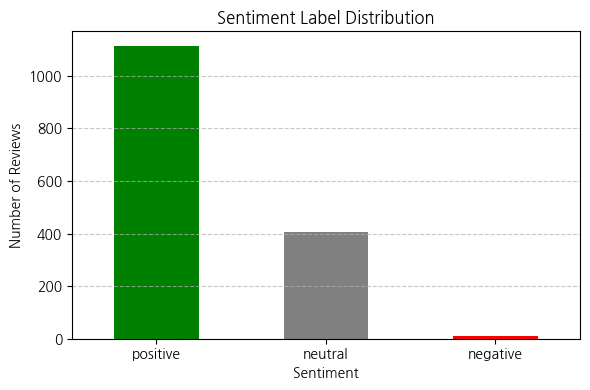

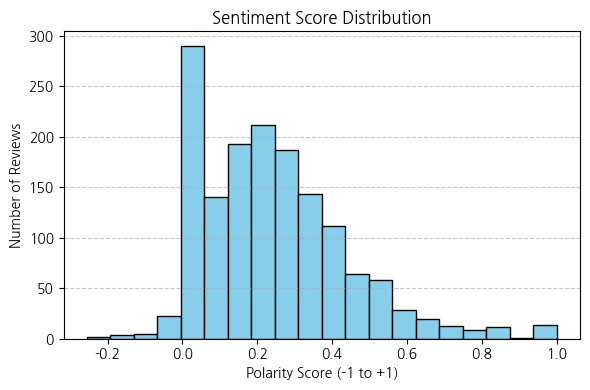

In [15]:
# 1. Í∞êÏÑ± ÎùºÎ≤® Î∂ÑÌè¨ (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
label_counts = df_combined["sentiment_label"].value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Í∞êÏÑ± Ï†êÏàò Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)
plt.figure(figsize=(6, 4))
plt.hist(df_combined["sentiment_score"], bins=20, color='skyblue', edgecolor='black')
plt.title("Sentiment Score Distribution")
plt.xlabel("Polarity Score (-1 to +1)")
plt.ylabel("Number of Reviews")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- positive Î¶¨Î∑∞Í∞Ä Ï†ÑÏ≤¥Ïùò ÏïΩ 75% Ïù¥ÏÉÅÏúºÎ°ú ÏïïÎèÑÏ†Å Îã§Ïàò
- neutral Î¶¨Î∑∞Îäî ÏïΩ 25%, negativeÎäî Í∑πÏÜåÏàò

Í∑πÎã®ÏÑ±Ïù¥ ÎÇÆÍ≥†, ÎåÄÏ≤¥Î°ú Í∏çÏ†ïÏ†ÅÏù∏ ÌèâÍ∞ÄÍ∞Ä ÎßéÏùå

# ÏùòÎØ∏Ïó∞Í≤∞Îßù

## Ïû¨Î∞©Î¨∏ÏùòÌñ•Í≥º Ïó∞Í≥ÑÌïú ÏùòÎØ∏Ïó∞Í≤∞Îßù ÏãúÍ∞ÅÌôî

In [16]:
df_2024=pd.read_excel("/content/2024 ·Ñã·Ö¨·ÑÖ·Ö¢·ÑÄ·Ö™·Ü´·ÑÄ·Ö™·Üº·ÑÄ·Ö¢·Ü®·Ñå·Ö©·Ñâ·Ö°_Data.xlsx")

In [17]:
place_map = {
    47004.0: "Bulguksa",         # Î∂àÍµ≠ÏÇ¨
    47001.0: "Hahoe Village",    # ÏïàÎèôÌïòÌöåÎßàÏùÑ
    42001.0: "Nami Island",      # ÎÇ®Ïù¥ÏÑ¨
    42002.0: "Seoraksan",         # ÏÑ§ÏïÖÏÇ∞
    47051.0: "Gyeongju Museum",  # Í≤ΩÏ£ºÎ∞ïÎ¨ºÍ¥Ä
    47054.0: "Andong Museum"
}

In [19]:
print(df_2024.dtypes)

pnid         int64
MVIT         int64
RVIT         int64
XRVIT      float64
TYP          int64
            ...   
weight1    float64
weight2    float64
weight3    float64
weight4    float64
weight     float64
Length: 402, dtype: object


In [21]:
print(df_2024[["RVIT","XRVIT","TYP"]].head(10))

   RVIT  XRVIT  TYP
0     4    5.0    1
1     4    5.0    1
2     3    5.0    1
3     1    NaN    1
4     4    5.0    1
5     1    NaN    1
6     2    5.0    1
7     1    NaN    1
8     2    5.0    1
9     1    NaN    1


In [ ]:
# weight Ïª¨Îüº Ïù¥Î¶ÑÏù¥ "weight" ÎòêÎäî "weight1" Îì±Ïù∏ Í≤ΩÏö∞
def weighted_avg(series, weights):
    mask = series.notna() & weights.notna()
    if mask.sum() == 0:
        return None
    return np.average(series[mask], weights=weights[mask])

# Ïû•ÏÜåÎ≥Ñ Í∞ÄÏ§ë ÌèâÍ∑† Í≥ÑÏÇ∞
place_q13 = (
    df_2024[["Q9_1_1", "Q13", "weight"]]
    .dropna()
    .groupby("Q9_1_1")
    .apply(lambda g: pd.Series({
        "q13_mean": weighted_avg(g["Q13"], g["weight"])
    }))
    .reset_index()
)
place_q13["place"] = place_q13["Q9_1_1"].map(place_map)

# 2. df_combinedÏóê Ïû¨Î∞©Î¨∏ÏùòÌñ• ÌèâÍ∑† Î≥ëÌï©
df_combined = df_combined.merge(place_q13[["place", "q13_mean"]], on="place", how="left")

/tmp/ipython-input-2850225826.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [ ]:
place_q13.head()

Q9_1_1  q13_mean place
0   11001  4.589103   NaN
1   11002  4.682435   NaN
2   11003  4.603006   NaN
3   11004  4.670628   NaN
4   11005  4.612220   NaN

In [ ]:
# df_combined.drop(columns = {'q13_mean_x',	'q13_mean_y'})

doc_id                                             review  \
0        NaN  ÏµúÍ∑ºÏàúÍ∞ÄÏû• ÏµúÍ∑ºÏùò Í≤åÏãú ÎÇ†ÏßúÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨Îêú Î¶¨Î∑∞.ÏÉÅÏÑ∏ Î¶¨Î∑∞:ÎåÄÍ∏∞ Ïãú...   
1        NaN                                       One Must Go!   
2        0.0  If in Seoul one must go. Very romantic and ext...   
3        1.0  From Seoul to Serenity: A Day on Nami Island N...   
4        2.0  Nami Island - yeah Was great to see the island...   
...      ...                                                ...   
1525  1302.0  This is a great museum. It's small enough to g...   
1526  1303.0  When travelling around South Korea there are m...   
1527  1304.0  I had a beautiful afternoon in Gyeongju gettin...   
1528  1305.0  Excellent museum with lots of fascinating exhi...   
1529  1306.0  Gyeongju has an incredible past. This museum c...   

                place         type  sentiment_score sentiment_label  doc_id_x  \
0         Nami Island  traditional         0.000000         neutral         0   
1         Nami Island  traditional         0.000000         neutral         1   
2         Nami Island  traditional         0.280926        positive         2   
3         Nami Island  traditional         0.365625        positive         3   
4         Nami Island  traditional         0.250000        positive         4   
...               ...          ...              ...             ...       ...   
1525  Gyeongju Museum       museum         0.242000        positive      1525   
1526  Gyeongju Museum       museum         0.345833        positive      1526   
1527  Gyeongju Museum       museum         0.304167        positive      1527   
1528  Gyeongju Museum       museum         0.081944         neutral      1528   
1529  Gyeongju Museum       museum         0.357812        positive      1529   

                                               tokens_x  \
0                                                    []   
1                                                    []   
2     [beat, carpark, clay, efficiently, extra, fasc...   
3     [calm, colorful, escape, magic, nami, pleasure...   
4                                          [nami, yeah]   
...                                                 ...   
1525  [argue, asia, australian, chinese, contain, cr...   
1526  [ancient, behave, capital, careful, caretaker,...   
1527  [absorb, ancient, burial, experienced, groovy,...   
1528  [description, fascinate, general, justice, par...   
1529  [ancient, artifact, audio, excavation, fascina...   

                                         cleaned_review  doc_id_y  \
0     beat carpark clay efficiently extra fascinate ...       NaN   
1     calm colorful escape magic nami pleasure river...       NaN   
2                                             nami yeah       0.0   
3     activity aside bind boat box break caf courage...       1.0   
4     airport becareful beware bicycle cambodia chin...       2.0   
...                                                 ...       ...   
1525                                                       1302.0   
1526                                                       1303.0   
1527                                                       1304.0   
1528                                                       1305.0   
1529                                                       1306.0   

                                               tokens_y  \
0                                                   NaN   
1                                                   NaN   
2     [beat, carpark, clay, efficiently, extra, fasc...   
3     [calm, colorful, escape, magic, nami, pleasure...   
4                                          [nami, yeah]   
...                                                 ...   
1525  [argue, asia, australian, chinese, contain, cr...   
1526  [ancient, behave, capital, careful, caretaker,...   
1527  [absorb, ancient, burial, experienced, groovy,...   
1528  [description, fascinate,

q13_mean :

df_2024ÏóêÏÑú Q9_1_1(Ïû•ÏÜå ÏΩîÎìú)Î≥ÑÎ°ú Ïû¨Î∞©Î¨∏ ÏùòÌñ•(Q13)ÏùÑ ÌèâÍ∑† ÎÇ∏ Í∞í

(=Ïû•ÏÜå ÏûêÏ≤¥Ïùò Ïû¨Î∞©Î¨∏ Îß§Î†•ÎèÑ)

Îî∞ÎùºÏÑú Í∞ôÏùÄ Ïû•ÏÜåÏùò Î¶¨Î∑∞ÏóêÎäî Î™®Îëê ÎèôÏùºÌïú Í∞íÏù¥ Îì§Ïñ¥Í∞ÄÎäîÍ≤å ÎßûÏùå

In [ ]:
print(df_combined["place"].unique())


['Nami Island' 'Seoraksan' 'Bulguksa' 'Hahoe Village' 'Andong Museum'
 'Gyeongju Museum']


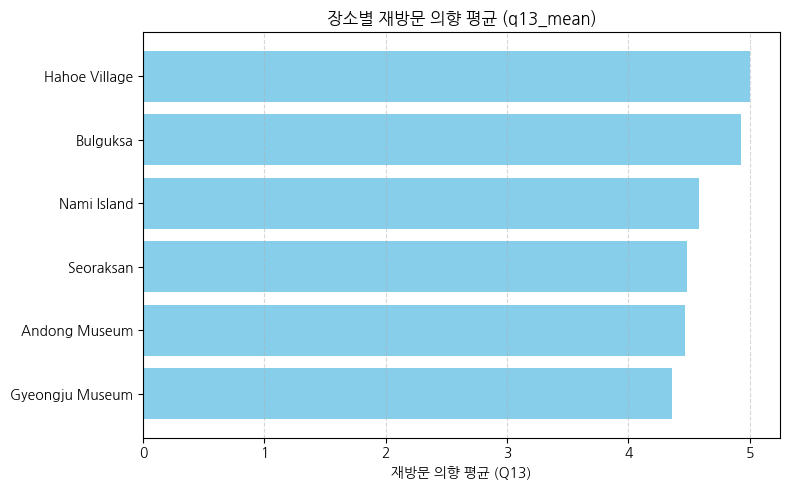

In [ ]:
import matplotlib.pyplot as plt

# Ïû•ÏÜåÎ≥Ñ ÌèâÍ∑† Ïû¨Î∞©Î¨∏ÏùòÌñ• Í∞í Ï∂îÏ∂ú
df_q13_place = df_combined[["place", "q13_mean"]].drop_duplicates().sort_values(by="q13_mean", ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.barh(df_q13_place["place"], df_q13_place["q13_mean"], color="skyblue")
plt.xlabel("Ïû¨Î∞©Î¨∏ ÏùòÌñ• ÌèâÍ∑† (Q13)")
plt.title("Ïû•ÏÜåÎ≥Ñ Ïû¨Î∞©Î¨∏ ÏùòÌñ• ÌèâÍ∑† (q13_mean)")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import numpy as np
import matplotlib.colors as mcolors

def plot_network_with_q13(df, activity_type, top_n=80):
    df_type = df[df["type"] == activity_type]

    cooccurrence = []
    word_q13 = []

    for _, row in df_type.iterrows():
        tokens = row["tokens"]
        q13 = row["q13_mean"]  # ÎòêÎäî "q13_mean"
        if isinstance(tokens, list):
            tokens = list(set(tokens))
            cooccurrence += list(combinations(tokens, 2))
            for word in tokens:
                word_q13.append((word, q13))

    pair_counts = Counter(cooccurrence).most_common(top_n)

    df_word_q13 = pd.DataFrame(word_q13, columns=["word", "q13"])
    word_avg_q13 = df_word_q13.groupby("word")["q13"].mean().to_dict()

    G = nx.Graph()
    for (w1, w2), count in pair_counts:
        G.add_edge(w1, w2, weight=count)

    pos = nx.spring_layout(G, k=0.5, seed=42)
    weights = [d["weight"] for _, _, d in G.edges(data=True)]
    node_colors = [word_avg_q13.get(n, 4.5) for n in G.nodes()]

    # üéØ Î™ÖÏãúÏ†ÅÏúºÎ°ú fig, ax Í∞ùÏ≤¥ ÏÉùÏÑ±
    fig, ax = plt.subplots(figsize=(10, 8))

    nx.draw(
        G, pos, ax=ax, with_labels=True, node_size=700, font_size=10,
        edge_color=weights, edge_cmap=plt.cm.Blues, width=2,
        edge_vmin=min(weights), edge_vmax=max(weights),
        node_color=node_colors, cmap=plt.cm.Reds
    )

    # ÏÉâÏÉÅ Ï†ïÎ≥¥ Î™ÖÌôïÌûà Ïó∞Í≤∞
    norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label("ÌèâÍ∑† q13 (Ïû¨Î∞©Î¨∏ ÏùòÌñ•)")

    ax.set_title(f"[{activity_type.upper()}] ÌÇ§ÏõåÎìú √ó Ïû¨Î∞©Î¨∏ ÏùòÌñ• Í∞ïÏ°∞")
    plt.tight_layout()
    plt.show()


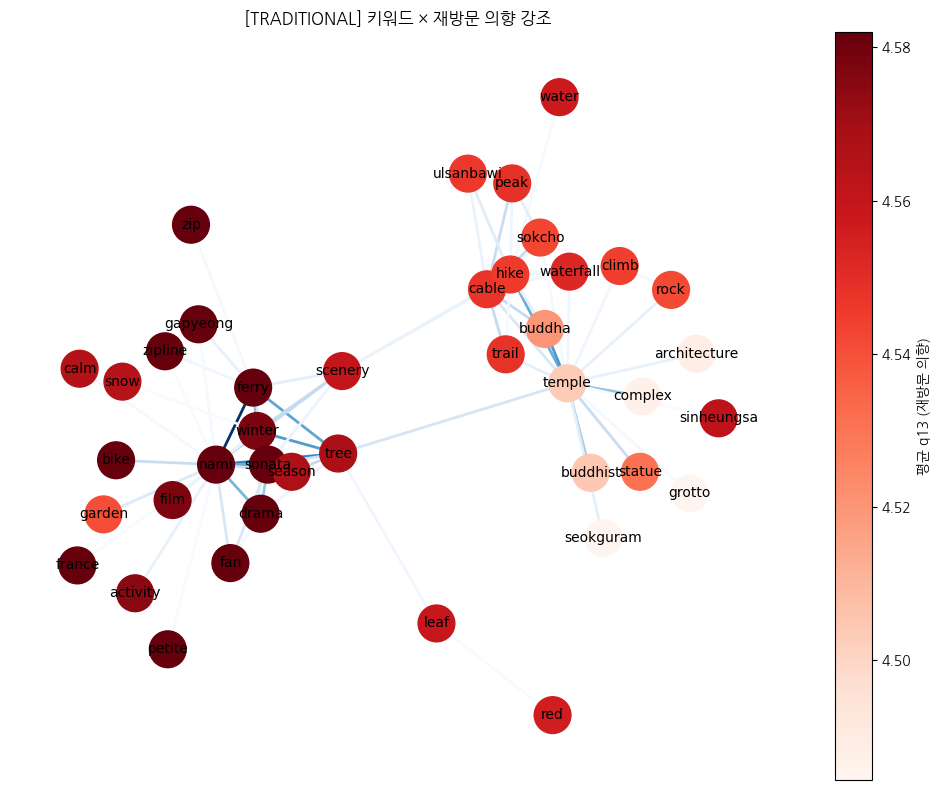

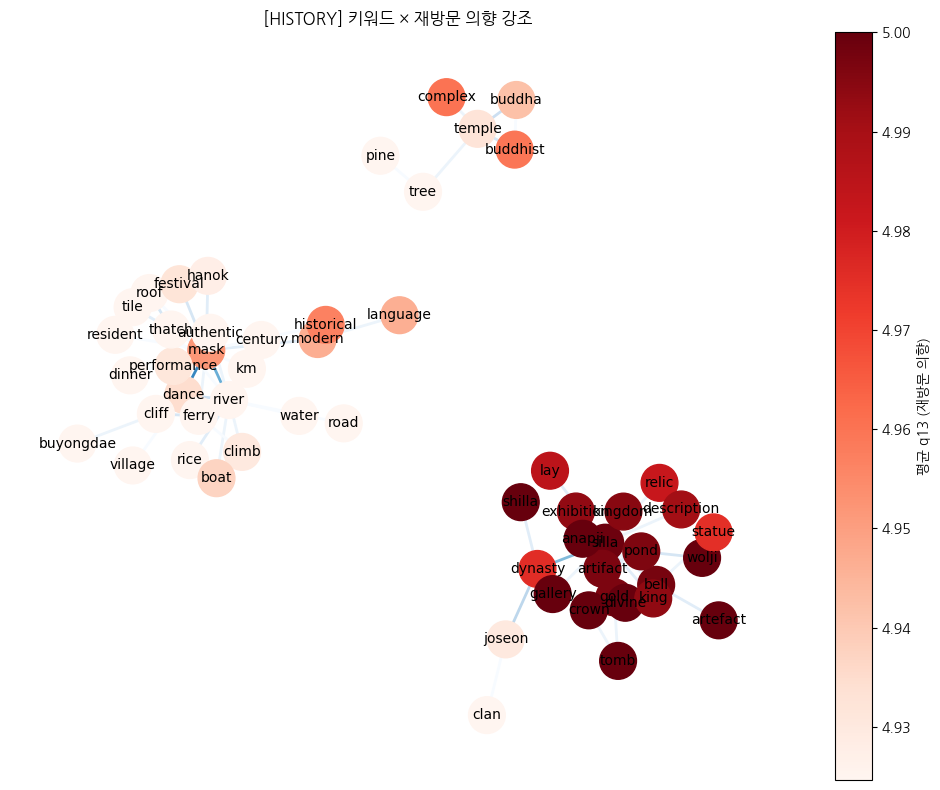

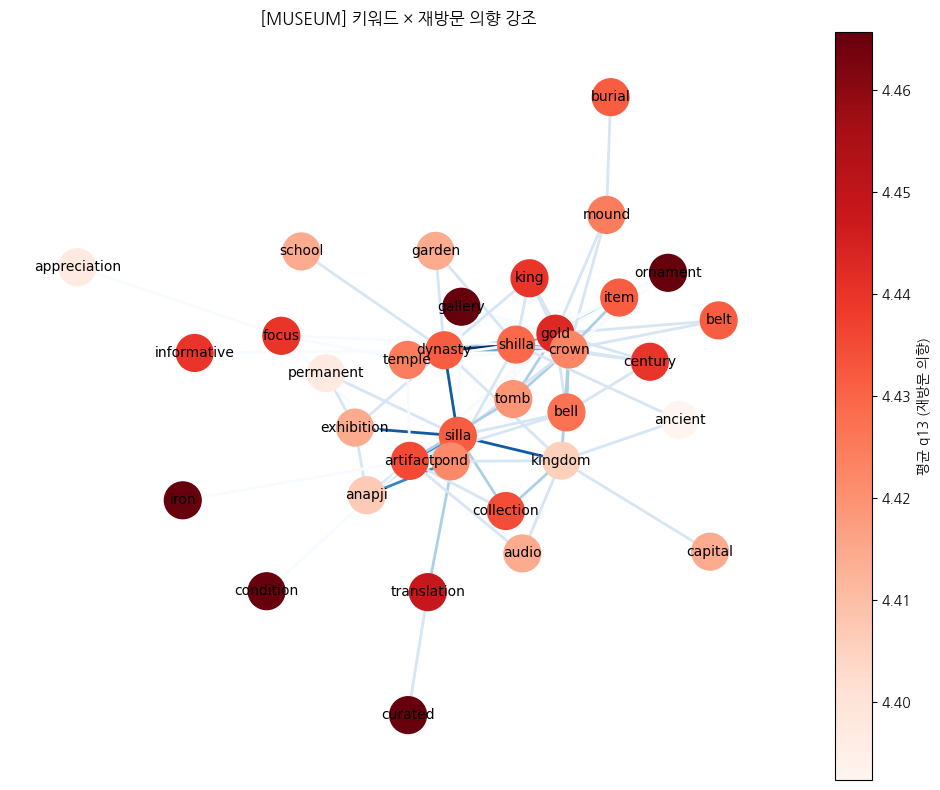

In [ ]:
plot_network_with_q13(df_combined, "traditional")     # ÏûêÏó∞Í≤ΩÍ¥ÄÌòï
plot_network_with_q13(df_combined, "history")    # Ïó≠ÏÇ¨Î¨∏ÌôîÌòï
plot_network_with_q13(df_combined, "museum")    # Ïó≠ÏÇ¨Î¨∏ÌôîÌòï

## Í∞êÏ†ï Í∞ÄÏ§ëÏπòÎ∂ÄÏó¨ ÏùòÎØ∏Ïó∞Í≤∞Îßù

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict
import numpy as np
import matplotlib.colors as mcolors

def plot_sentiment_weighted_network(df, activity_type, top_n=80):
    # 1. ÌÉÄÏûÖ ÌïÑÌÑ∞ÎßÅ
    df_type = df[df["type"] == activity_type]

    # 2. Í∞êÏÑ± Í∞ÄÏ§ë Îã®Ïñ¥Ïåç ÎàÑÏ†Å
    pair_weights = defaultdict(float)
    word_sentiments = defaultdict(list)

    for _, row in df_type.iterrows():
        tokens = row["tokens"]
        sentiment = row["sentiment_score"]
        if isinstance(tokens, list):
            tokens = list(set(tokens))  # Ï§ëÎ≥µ Ï†úÍ±∞
            for pair in combinations(tokens, 2):
                pair_weights[pair] += sentiment  # Í∞êÏÑ± Í∞ÄÏ§ëÏπò ÎàÑÏ†Å
            for word in tokens:
                word_sentiments[word].append(sentiment)

    # 3. ÏÉÅÏúÑ Îã®Ïñ¥Ïåç
    top_pairs = sorted(pair_weights.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # 4. Îã®Ïñ¥Î≥Ñ ÌèâÍ∑† Í∞êÏÑ± Ï†êÏàò
    word_avg_sentiment = {word: np.mean(scores) for word, scores in word_sentiments.items()}

    # 5. Í∑∏ÎûòÌîÑ Íµ¨ÏÑ±
    G = nx.Graph()
    for (w1, w2), weight in top_pairs:
        G.add_edge(w1, w2, weight=weight)

    pos = nx.spring_layout(G, k=0.5, seed=42)
    edge_weights = [d["weight"] for (_, _, d) in G.edges(data=True)]
    node_colors = [word_avg_sentiment.get(n, 0.0) for n in G.nodes()]

    # üé® ÏãúÍ∞ÅÌôî with colorbar fix
    fig, ax = plt.subplots(figsize=(10, 8))
    nodes = nx.draw_networkx_nodes(
        G, pos, ax=ax,
        node_color=node_colors,
        cmap=plt.cm.Reds,
        node_size=700
    )
    nx.draw_networkx_edges(
        G, pos, ax=ax,
        edge_color=edge_weights,
        edge_cmap=plt.cm.Blues,
        width=2
    )
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

    # colorbar ÏÑ§Ï†ï
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("ÌèâÍ∑† Í∞êÏÑ± Ï†êÏàò")

    ax.set_title(f"[{activity_type.upper()}] Í∞êÏÑ±Í∞ÄÏ§ë ÏùòÎØ∏Ïó∞Í≤∞Îßù", fontsize=14)
    ax.axis("off")
    plt.show()

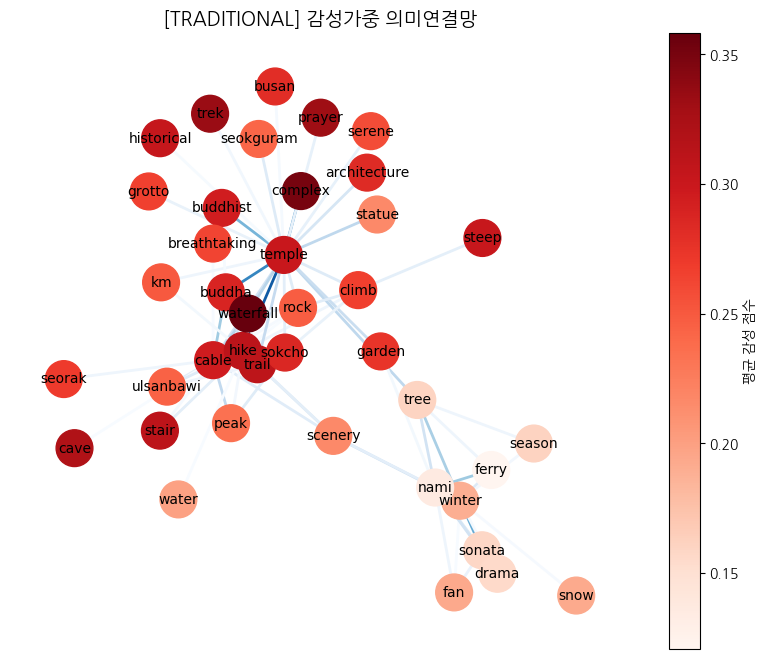

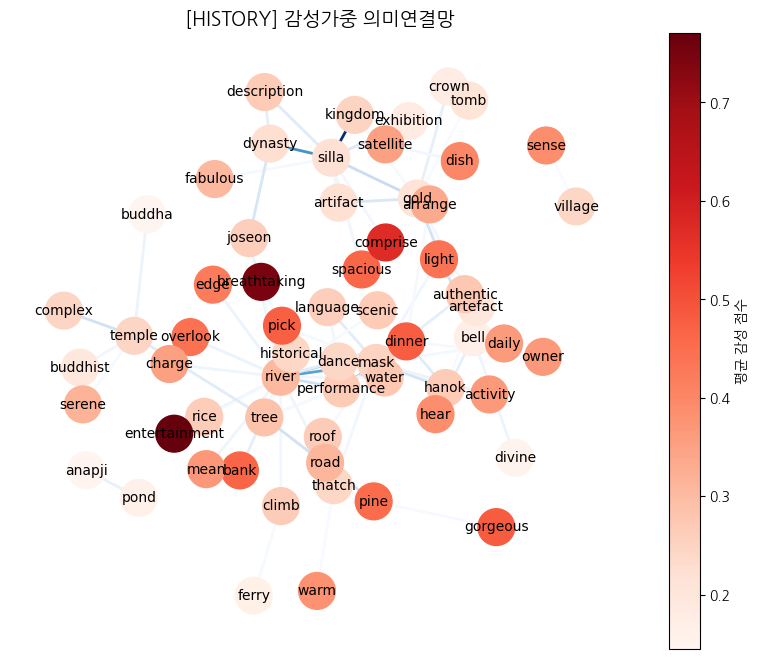

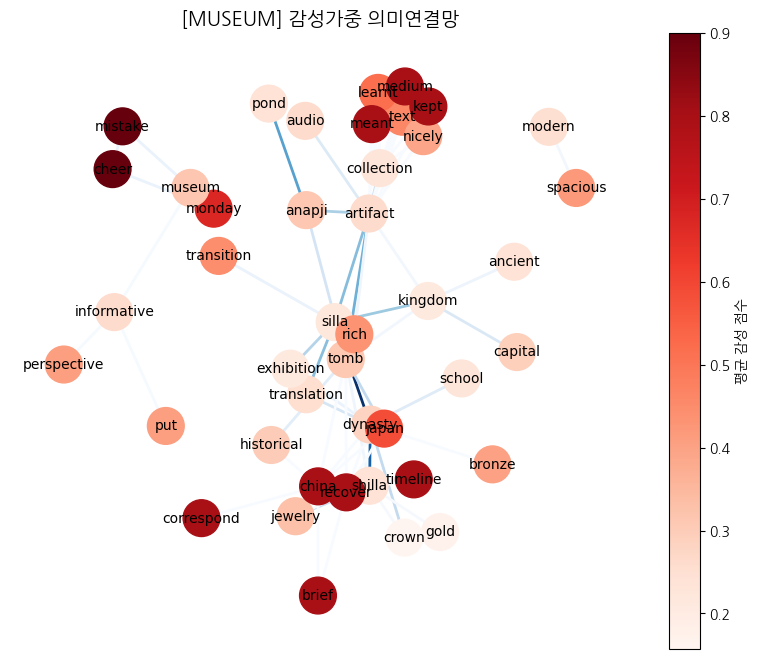

In [ ]:
plot_sentiment_weighted_network(df_combined, "traditional")
plot_sentiment_weighted_network(df_combined, "history")
plot_sentiment_weighted_network(df_combined, "museum")